In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from stimupy.stimuli.whites import generalized

#supress showing plots, instead load generated png files
matplotlib.use('Agg')
from IPython.display import Image as IMG
from IPython.display import display
from PIL import Image
import os, os.path


#Default generates plots in dark mode
plt.style.use('dark_background') 
nice_cyan = (0,0.8,0.6)
nice_blue = (0.3,0.4,1)
nice_violet = (0.9,0.4,1)
nice_purple = (1,0.1,1)
nice_red = (0.8,0,0.1)
nice_yellow = (1,0.7,0)
nice_orange = (1,0.5,0)
off_white = (1,0.9,1)

nice_colors = [nice_cyan, nice_blue, nice_yellow]

In [39]:
#Run this cell if you want the plots in light mode
plt.style.use('default')
nice_cyan = (0.1,1,0.9)
nice_blue = (0.3,0.8,1)
nice_purple = (1,0.3,1)
nice_red = (0.9,0,0.1)
nice_yellow = (1,0.8,0.2)
nice_orange = (1,0.6,0.1)
off_white = (1,0.9,1)

In [40]:
# this loads all images from a given directory and returns a collage of them

def create_collage(dir, rows, cols, shrink, folder):
    image_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    size_reference = Image.open(dir+image_files[0])
    c_width = size_reference.width * cols
    c_height = size_reference.height * rows
    collage = Image.new('RGB', (c_width, c_height))
    x_offset = 0
    y_offset = 0

    for image_file in image_files:
        image_path = os.path.join(dir, image_file)
        img = Image.open(image_path)
        img.thumbnail((c_width, c_height))
        collage.paste(img, (x_offset, y_offset))
    
        x_offset += img.width
        if x_offset >= c_width:
            x_offset = 0
            y_offset += img.height

    if (shrink > 1):
        new_width = int(c_width / shrink)  
        aspect_ratio = c_width / c_height
        new_height = int(new_width / aspect_ratio)
        collage = collage.resize((new_width, new_height), Image.ANTIALIAS)
    
    collage.save(folder)
    
    return collage

### Transform image from desired luminance values (physical) into normalized values for lab monitor to display

In [41]:
# Our image is not saved as a png file but as a npy array
luminance_img = np.load("luminance_img.npy", allow_pickle=True)
luminance_img

array([[41.8, 41.8, 41.8, ..., 41.8, 41.8, 41.8],
       [46.2, 46.2, 46.2, ..., 46.2, 46.2, 46.2],
       [46.2, 46.2, 46.2, ..., 46.2, 46.2, 46.2],
       ...,
       [41.8, 41.8, 41.8, ..., 41.8, 41.8, 41.8],
       [41.8, 41.8, 41.8, ..., 41.8, 41.8, 41.8],
       [41.8, 41.8, 41.8, ..., 41.8, 41.8, 41.8]], dtype=float32)

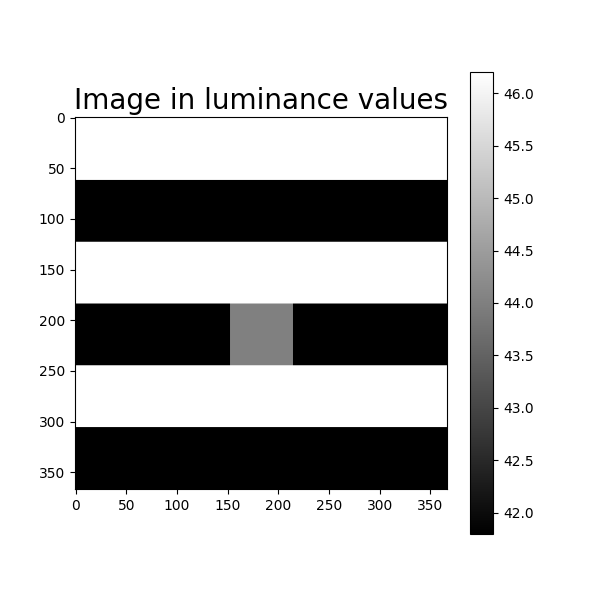

In [42]:
# display image
def plot_image(img, title, folder):
    plt.figure(figsize=(6, 6)) # clears previous plot
    plt.imshow(img, cmap = "gray")
    plt.colorbar()
    plt.title(title, fontsize = 20)
    plt.savefig(folder)

plot_image(luminance_img, "Image in luminance values","luminance_img_plot.png")
display(IMG("luminance_img_plot.png"))


In [43]:
# sorted by age descending
LUT_list = [pd.read_csv('lut_viewpixx.csv', sep=' '), pd.read_csv('lut_viewpixx_october9.csv', sep=' '), pd.read_csv('lut_viewpixx_nov12.csv', sep=' ')] 
LUT_names = ["Viewpixx old", "Viewpixx October 2024", "Viewpixx November 2024"]

# Dataset
X = [LUT_list[0]["IntensityIn"],LUT_list[1]["IntensityIn"],LUT_list[2]["IntensityIn"]]

# Labels for dataset
Y = [LUT_list[0]["Luminance"], LUT_list[1]["Luminance"], LUT_list[2]["Luminance"]]

print(f"There have been {len(X[0])} {len(X[1])} and {len(X[2])} measurements taken." )

#example head of dataframe
LUT_list[0][["IntensityIn", "Luminance"]]

There have been 254 256 and 255 measurements taken.


,IntensityIn,Luminance
0,0.000000,0.221000
1,0.000015,0.233000
2,0.000061,0.256667
3,0.000153,0.275000
4,0.000229,0.300000
...,...,...
249,0.983749,237.366667
250,0.988205,238.500000
251,0.992920,239.600000
252,0.997513,240.066667


In [44]:
def scatter_only_plot_A(X, Y,folder,title):

    plt.figure(figsize=(8, 6))
    for i in range(0,len(X)):
        plt.scatter(X[i],Y[i], s = 20, color = nice_colors[i],  label=f"LUT {LUT_names[i]}", zorder=2)

    plt.xlim(-0.001,1.001)
    plt.ylim(-0.001,250)
    plt.rc('text', usetex=True)
    plt.xlabel("$x$", fontsize = 18, rotation = 0)
    plt.ylabel("$y$", fontsize = 18, rotation = 0)
    plt.xticks([0,0.2,0.4,0.6,0.8,1], fontsize = 14)
    plt.yticks([0,100,200,240], fontsize = 14)
    plt.legend(fontsize = 18)
    plt.title(title, fontsize = 24)
    plt.xlabel("Normalized value $x$", fontsize = 18, rotation = 0)
    plt.ylabel("Luminance value $cd/m^2$", fontsize = 18, rotation = 90)
    plt.savefig(folder)

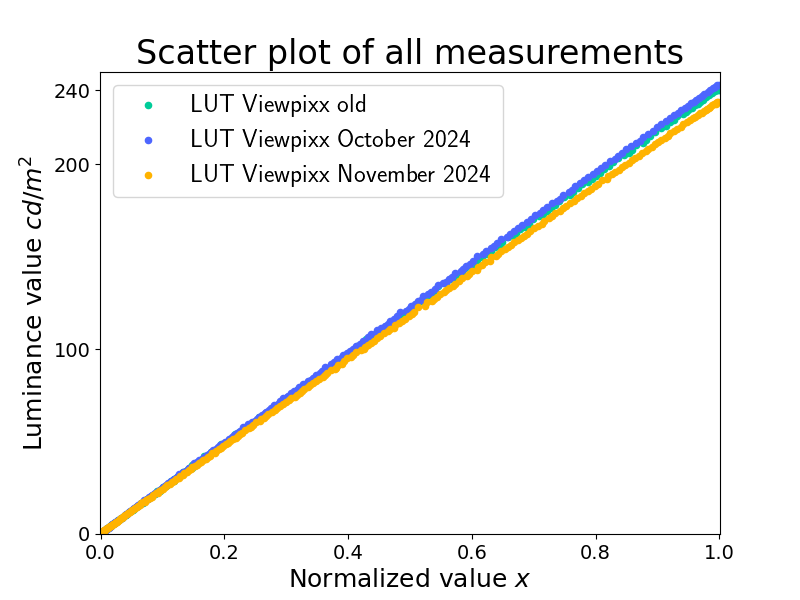

In [45]:
scatter_only_plot_A(X,Y,"lutplot.png","Scatter plot of all measurements")
display(IMG("lutplot.png"))

In [46]:
# fit linear regression model 
linregress_model = stats.linregress(X[0], Y[0])
w = linregress_model[0] # slope
beta = linregress_model[1] # offset

def linear_fit(x):
    return (w * x + beta)

X_linspace = np.linspace(0,1, 1000)
Y_linspace = linear_fit(X_linspace)

In [47]:
normalized_value = 0.18
expected_luminance_value = linear_fit(normalized_value)

print(f"expected luminance value of {normalized_value} is {expected_luminance_value} cd/m^2.")

expected luminance value of 0.18 is 44.116519838175115 cd/m^2.


In [48]:
def plot_function(X_lin,Y_lin,X_list, Y_list, title, folder):
    plt.figure(figsize=(8, 6))

    plt.plot(X_lin,Y_lin, color = nice_orange, linewidth = 5,zorder=2)
    plt.plot(X_lin,Y_lin, color = nice_red, linewidth = 2,zorder=2, label = "Linear fit")

    plt.scatter(X_list,Y_list, s = 30, color = nice_yellow,  label="Luminance measurement", zorder=1)

    plt.xlim(-0.001,1.001)
    plt.ylim(-0.001,250)
    plt.rc('text', usetex=True)
    plt.xlabel("Normalized value $x$", fontsize = 18, rotation = 0)
    plt.ylabel("Luminance value $cd/m^2$", fontsize = 18, rotation = 90)
    plt.xticks([0,0.2,0.4,0.6,0.8,1], fontsize = 14)
    plt.yticks([0,100,200,240], fontsize = 14)
    plt.legend(fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)

C:\Users\hanna\AppData\Local\Temp\ipykernel_14440\2733042607.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


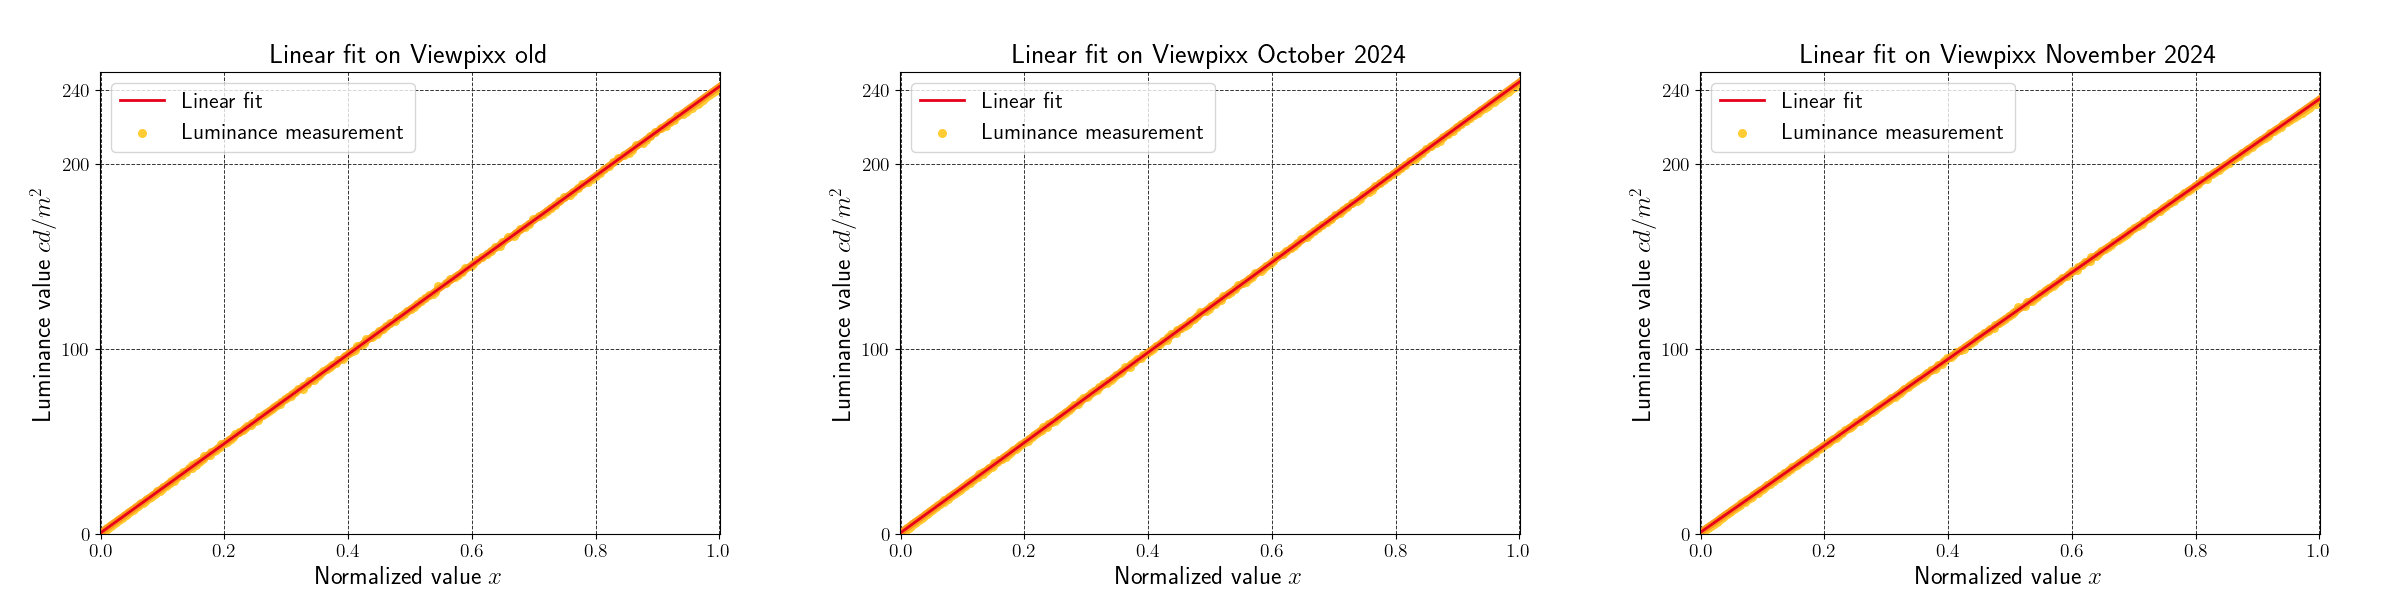

In [49]:
for i in range(0,len(LUT_list)):
    # fit linear regression model on i-th LUT
    linregress_model = stats.linregress(X[i], Y[i])
    w = linregress_model[0] # slope
    beta = linregress_model[1] # offset

    def linear_fit(x):
        return (w * x + beta)

    X_linspace = np.linspace(0,1, 1000)
    Y_linspace = linear_fit(X_linspace)

    plot_function(X_linspace,Y_linspace,X[i], Y[i],f"Linear fit on {LUT_names[i]}", f"lutfits/linear_fit{i}.png")

create_collage("lutfits/", 1, 3, 1,"Fit_all_lut.png")

In [50]:
def linear_fit(x,w, beta):
    return (w * x + beta)

def linear_fit_inverse(y, w, beta):
    return ((y - beta) / w)

In [51]:
i = 2
linregress_model = stats.linregress(X[i], Y[i])
w = linregress_model[0] # slope
beta = linregress_model[1] # offset

In [52]:
normalized_value = 0.18
expected_luminance_value = linear_fit(normalized_value, w, beta)

print(f"expected luminance based on {LUT_names[i]} for value of {normalized_value} is {expected_luminance_value} cd/m^2.")

expected luminance based on Viewpixx November 2024 for value of 0.18 is 43.14907116400592 cd/m^2.


In [53]:
luminance_value = 43
expected_normalized_value = linear_fit_inverse(luminance_value, w, beta)

print(f"Expected normalized value of {luminance_value} cd/m^2 is {expected_normalized_value}.")

Expected normalized value of 43 cd/m^2 is 0.17936384949392295.


## Converting an image to a normalized values

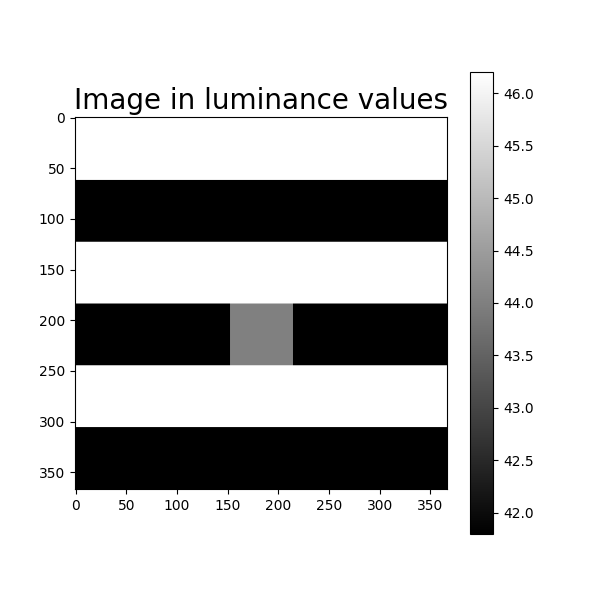

In [54]:
display(IMG("luminance_img_plot.png"))

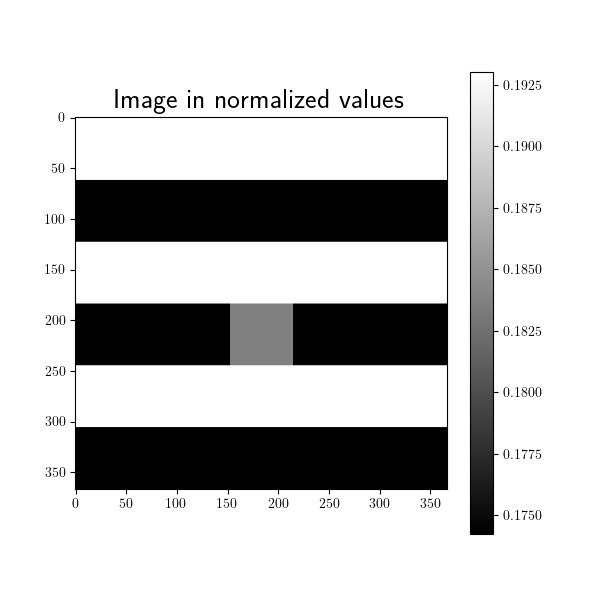

In [55]:
normalized_img =  linear_fit_inverse(luminance_img, w, beta)

plot_image(normalized_img, "Image in normalized values","normalized_img_plot.png")
display(IMG("normalized_img_plot.png"))